In [1]:
n=3000
savedir = 'new_3d/a2_n1_T6_w8/' + str(n)
print(savedir)
####import sdf data#####
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import cm

import sdf


import scipy.fftpack as fftpack
import numpy as np
#data=sdf.read('data/2800.sdf',dict=True)
#bz=data['Electric Field/Ey'].data[:,:,int(188/2)]
#ne=data['Derived/Number_Density/electron1'].data[:,:,int(188/2)]

Ey=np.loadtxt(savedir+'_ey.txt')
bz=np.loadtxt(savedir+'_bz.txt')
ne=np.loadtxt(savedir+'_ne.txt')

print(Ey.shape)
ne_y0=ne[:,int(188/2)]
Ey_y0=Ey[:,int(188/2)]
hx = fftpack.hilbert(Ey_y0)
hy = np.sqrt(Ey_y0**2+hx**2)

new_3d/a2_n1_T6_w8/3000
(1908, 188)


In [30]:
    Ex=np.loadtxt(savedir+'_ex.txt')
    Ex_y0=Ex[:,int(188/2)]
    #Ey=data["Electric Field/Ey"].data[:,:,int(188/2)]
    Ey=np.loadtxt(savedir+'_ey.txt')
    Ey_y0=Ey[:,int(188/2)]
    k,x,zxx=signal.stft(Ey_y0,fs=2*pi/const.delta_x,nperseg=const.nperseg)
    zxx=abs(zxx)
    zxx.shape

(126, 17)

In [2]:
import numpy
import sdf
import constant as const
import scipy.signal as signal
import numpy as np
pi=3.14
def E_x_y_zxx(a):        
    #sdfdir=const.sdfdir +str(a).zfill(const.filenumber)+".sdf"
    #data=sdf.read(sdfdir,dict=True)
    #Ex=data["Electric Field/Ex"].data[:,:,int(188/2)]
    Ex=np.loadtxt(savedir+'_ex.txt')
    Ex_y0=Ex[:,int(188/2)]
    #Ey=data["Electric Field/Ey"].data[:,:,int(188/2)]
    Ey=np.loadtxt(savedir+'_ey.txt')
    Ey_y0=Ey[:,int(188/2)]
    k,x,zxx=signal.stft(Ey_y0,fs=2*pi/const.delta_x,nperseg=const.nperseg)
    zxx=abs(zxx)
    index = np.unravel_index(zxx.argmax(),zxx.shape)
    k_x=np.ones(const.Nx)*k[index[0]]
    for i in range(0,const.Nx):
        x=i
        #print(x)
        a=zxx[:,int(x/const.nperseg)]
        a=a.tolist()
        a[0]=0
        max_index=a.index(max(a))
        if max(a) > 0.2 * zxx[index[0]][index[1]]:
            k_x[i]=(k[max_index])
    #ne=data['Derived/Number_Density/electron1'].data
    ne=np.loadtxt(savedir+'_ne.txt')
    ne_y0=ne[:,int(const.Ny/2)]#,int(const.Ny/2)]

    return [Ex_y0,Ey_y0,zxx,ne_y0,k_x]
def k(x,zxx):
    a=zxx[:,int(x/const.nperseg)]
    a=a.tolist()
    a[0]=0
    max_index=a.index(max(a))
    # index=(max_index*pi)/(len(a)*const.delta_x)
    index =  (pi/const.delta_x)/len(a) * max_index
    #print "max(k_x),max_index,len(k_x),index",max(a),max_index,len(a),index # ,index
    return index
def scalar_p(Ex_y0):
    scalar_p=0
    e=1.6e-19
    c=3e8
    m0=9.1e-31
    import constant as const
    a=np.zeros(const.Nx)
    x=const.Nx - 1
    for i in range(0,x+1):
        scalar_p=Ex_y0[x-i]*const.delta_x+scalar_p 
    #a.append(e*scalar_p/(m0*c**2))   
        a[x-i]=e*scalar_p/(m0*c**2)  
    #   print  'n_scalar',a
    return a
def wp_2(x,ne_y0):
    ne=ne_y0[x]
    #ne=1e25
    e=1.6e-19
    m0=9.1e-31
#print "ne",ne
    w_p_2=ne*e**2/(m0*8.85e-12)
#print "w_p",w_p_2
    return w_p_2
def ref_index(x,Ex_y0,Ey_y0,zxx,ne_y0,k_x):
    c=3e8
    wp_x_2=wp_2(x,ne_y0)
#print "wp^2",wp_x_2
#p_y0=scalar_p(Ex_y0)
    p_y0_x=p_y0[x]
#print "scalar",p_y0_x
#k_x=k(x,zxx)
    k_x=k_x[x]
    w0=k_x*c/1
#print "w0",w0
    a=wp_x_2/(1+p_y0_x)
    b=(k_x*c)**2
    c=-(k_x*c)**2
    #print("a,b,c",a,b,c)
    result=np.roots([a,b,c])
    #print(result)
    return np.roots([a,b,c])
def ref_a(a):   
    ref=[]
    Ex_y0,Ey_y0,zxx,ne_y0,k_x=E_x_y_zxx(a)
    x=const.Nx
    global p_y0
    p_y0=scalar_p(Ex_y0)
    for i in range(0,const.Nx):
        index=ref_index(i,Ex_y0,Ey_y0,zxx,ne_y0,k_x)
        #print("c",c)
        s_a= type(index) == numpy.ndarray
        #print("type",a)
        if type(index) == numpy.ndarray:
            index=index[-1]
        #print("c[-1]",c)
        ref.append(index)
    #print("ref:",type(ref[0]))
    return ref
#def help():
#print "func.ref_a(a)"
#print "a,x=1,1"
#print "Ex_y0,Ey_y0,zxx,ne_y0,k_x=func.E_x_y_zxx(a)"
#print "global p_y0"
#print "func.p_y0=scalar_p(Ex_y0)"    
#print "func.ref_index(x,Ex_y0,Ey_y0,zxx,ne_y0)"
c=3e8
'''
x=2
Ex_y0,Ey_y0,zxx,ne_y0,k_x=E_x_y_zxx(2800)
print(zxx)
wp_x_2=wp_2(x,ne_y0)
#print(wp_x_2)
#print "wp^2",wp_x_2
#p_y0=scalar_p(Ex_y0)
p_y0_x=p_y0[x]
#print(p_y0_x)
#print "scalar",p_y0_x
#k_x=k(x,zxx)
k_x=k_x[x]
#print(k_x)
w0=k_x*c/1
#print "w0",w0
a=wp_x_2/(1+p_y0_x)
#print('a',a)
'''
x_ref=ref_a(2800)
x_ref=np.array(x_ref)
print(x_ref)

[0.98910973 0.99332402 0.98336088 ... 0.9418737  0.94218115 0.96623739]


[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.01668416  0.01668416  0.01668416 ...  0.01668416  0.01668416
   0.01668416]
 [ 0.03336831  0.03336831  0.03336831 ...  0.03336831  0.03336831
   0.03336831]
 ...
 [15.86663169 15.86663169 15.86663169 ... 15.86663169 15.86663169
  15.86663169]
 [15.88331584 15.88331584 15.88331584 ... 15.88331584 15.88331584
  15.88331584]
 [15.9        15.9        15.9        ... 15.9        15.9
  15.9       ]]


<Figure size 432x288 with 0 Axes>

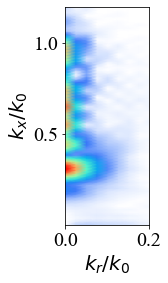

In [33]:
import constant as const
iname = 'rainbow'
def reg_cmap():
    iname = 'rainbow'
    oname = 'dist'    
    low = 0.15        
    high = 1.0

    #(position, [r,g,b,a] or #rrggbb)
    special = [(0,[1,1,1,1])]      
    cmap = plt.get_cmap(iname)
    N = int((high - low) * 256)
    values = np.linspace(low,high,N)
    colors = cmap(values)
    colorlist = [(values[i],colors[i]) for i in range(N)]
    colorlist = special + colorlist
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    #An other example: plt.cm.colors.LinearSegmentedColormap.from_list(‘cmap’, [‘#FFFFFF’, ‘#98F5FF’, ‘#00FF00’, ‘#FFFF00’,’#FF0000’, ‘#8B0000’], 256)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

cmap=reg_cmap()
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]

def a(x):
    if x>10:
        return x
plt.set_cmap(reg_cmap_transparent(iname,create_alpha(lambda x:(np.exp(x/(256))-0.8))))
cmap1 = plt.get_cmap()


font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 20,  
        } 
k0=2*3.14/10.6e-6
k1=2*3.14/1e-6
fs_x=2*3.14/const.delta_x/k0

fs_r=2*3.14/(40*10.6e-6/188)/k0

x=np.linspace(0,fs_x/2,int(1908/2))
r=np.linspace(0,fs_r/2,int(188/2))
R,X=np.meshgrid(r,x)
fig,ax=plt.subplots(figsize=(1.5,4))
#ax.set_xlim=((0,2))
#ax.set_ylim=((0,1))
k_bz2d=np.fft.fft2(bz)
#print(k_bz2d.shape)
np.savetxt('txt/'+str(n)+'_fuliye2d.txt',k_bz2d)

im4=ax.pcolormesh(R,X,abs(k_bz2d[:int(const.Nx/2),:int(const.Ny/2)]),cmap=cmap,shading='gouraud')
#ax.set_xlim=((0,R[0,1]))
#ax.set_ylim=((0,X[0,1]))

#plt.colorbar(im4)

###
plt.yticks([0.5,1])

###
axes = plt.gca()
axes.set_xlim([0,0.2])
axes.set_ylim([0,1.2])
ax.tick_params('both',labelsize=20)
ax.set_xlabel('${k_r}/{k_0}$',fontdict=font)
ax.set_ylabel('${k_x}/{k_0}$',fontdict=font)

print(X)
plt.show()
fig.savefig('fig/'+str(n)+'_fig2d.png',dpi=400,bbox_inches = 'tight')

In [5]:
I=R*1j+X

In [7]:
import cmath

a=cmath.polar()

TypeError: only length-1 arrays can be converted to Python scalars

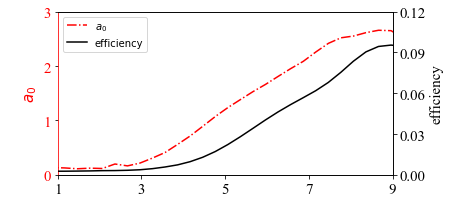

max: 4040740054526.6963


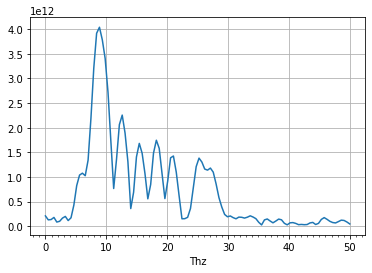

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import sdf
import matplotlib.pyplot as pl
from matplotlib.ticker import MultipleLocator, FuncFormatter
import constant as const
%matplotlib inline
#name="contrast/density_half"
locate=9000
x       = int(locate/(const.delta_x*const.x_interval*1e6))
load_dir="txt/a2_n1_T6_w8/xf.txt"
xf=np.loadtxt(load_dir)
savedir="txt/a2_n1_T6_w8/"
N0 = const.t_size
T=const.t_size*const.dt             #fs  #dt_snapshot*1e15  #t[x][t_size-1]-t[x][0]
fs=N0*1e3/T
length=xf.shape[1]
freqs=np.linspace(0,fs/2,length)
####transition Xf
Xf=xf[x]
#plot
#np.savetxt(str(name)+str(locate)+"_freqs.txt",Xf)
fig,ax=plt.subplots()
line=ax.plot(freqs,Xf)
#plt.xlim((0,50))
#ax.set_xlim([0,10])
#ax.set_ylim([0,1e11])
ax.xaxis.set_minor_locator( MultipleLocator(1) )
print("max:",str(max(Xf)))
ax.set_xlabel('Thz')
ax.set_ylabel('')
plt.grid()
np.savetxt(savedir+"freqs.txt",freqs)
np.savetxt(savedir+str(locate)+"Xf.txt",Xf)
fig.savefig(savedir+str(locate)+"freqs.png",dpi=160)

In [287]:
print('new')

new


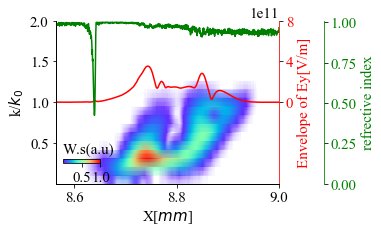

In [12]:
import matplotlib
import numpy as np
%matplotlib inline
from matplotlib import cm

####h
hx2 = fftpack.hilbert(x_ref)
hy2 = np.sqrt(x_ref**2+hx2**2)

####


####
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap
def reg_cmap():
    iname = 'rainbow'
    oname = 'dist'    
    low = 0.05        
    high = 1.0

    #(position, [r,g,b,a] or #rrggbb)
    special = [(0,[1,1,1,1])]      
    cmap = plt.get_cmap(iname)
    N = int((high - low) * 256)
    values = np.linspace(low,high,N)
    colors = cmap(values)
    colorlist = [(values[i],colors[i]) for i in range(N)]
    colorlist = special + colorlist
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    #An other example: plt.cm.colors.LinearSegmentedColormap.from_list(‘cmap’, [‘#FFFFFF’, ‘#98F5FF’, ‘#00FF00’, ‘#FFFF00’,’#FF0000’, ‘#8B0000’], 256)
    plt.cm.register_cmap(cmap=cmap)
    return cmap


def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
font = {'family' : 'Times New Roman',
        #'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 6
####
####
matplotlib.rc('font', **font)


fig,ax=plt.subplots(figsize=(4,3))
ax2=ax.twinx()
ax3=ax.twinx()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(True)
ax3.spines['right'].set_visible(True)

###spines color
ax3.spines['right'].set_color('green')
ax2.spines['right'].set_color('red')
labels=ax2.get_yticklabels()+ax3.get_yticklabels()
for tl in ax2.get_yticklabels():
    tl.set_color('r')
for tic in ax3.get_yticklabels():
    tic.set_color('g')
###

ax3.spines['right'].set_position(('axes',1.2))#'data',690))


#ax.spines['right'].set_color('none')
k0=2*3.14/const.lamada
k1=2*3.14/1e-6
fs=2*3.14/const.delta_x/k0
f,t,zxx=signal.stft(Ey_y0,fs=2*3.14/const.delta_x,nperseg=300,noverlap=299)



plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(np.exp(x/(256/5))-1.1))))
cmap = plt.get_cmap()

name='${e_k}$  '

d_x=n*10e-15*3e8*1e6-636

#cmap=reg_cmap()
cmap=reg_cmap()
ZZ=np.abs(zxx)/np.abs(zxx).max()
curve_cof= ax.pcolormesh((d_x+t*2*3.14/1e-6)*1e-3,f/k0,ZZ,cmap=cmap,shading='gouraud')
#ax=plt.gca()
#ax.set_xticks([200,400,600])#,fontdict=font)
#ax.set_xticklabels(['400','500','600'],fontdict=font)

d_x=n*10e-15*3e8*1e6*1e-3-636e-3

line2,= ax2.plot(np.linspace(d_x,d_x+60*10.6*1e-3,1908),hy, label="Ey", color='red')
line3,= ax3.plot(np.linspace(d_x,d_x+60*10.6*1e-3,1908),x_ref, label="ref", color='green')

#l1 = plt.legend([line2, line3], ["|Ey|", "ref"], loc='upper left')

###cbar and label
#position=fig.add_axes([0.72, 0.22, 0.13, 0.02])#位置[左,下,右,上]
position=fig.add_axes([0.15, 0.22, 0.13, 0.02])#位置[左,下,右,上]



cb=plt.colorbar(curve_cof,cax=position,orientation='horizontal')#方向
cb.ax.set_title('W.s(a.u)',fontdict=font,loc = 'left')#, fontdict=font)

curve_cof.set_clim((0.01,1))
###

ax.set_ylim((0,2))

ax2.set_ylim((-8e11,8e11))
ax3.set_ylim((0,1.01))

ax.set_xlim((d_x+200*1e-3,d_x+636*1e-3))

###set_ticks
ax.yaxis.set_ticks([0.5,1,1.5,2])
ax2.yaxis.set_ticks((0,4e11,8e11))
#ax2.yaxis.set_ticks([0.5,1,1.5,2])
#ax3.yaxis.set_ticks([0.5,1,1.5,2])

###
####
for tic in ax3.get_yticklabels():
    tic.set_color('g')
for tic in ax2.get_yticklabels():
    tic.set_color('r')
####label
ax.set_ylabel('k/${k_0}$',fontdict=font)
ax.set_xlabel('X'+ '[$mm$]')
ax2.set_ylabel('Envelope of Ey[V/m]',color='r')
ax3.set_ylabel('refrective index',color='g')
####

####no ticks####
##ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax2.set_yticklabels([])

#ax.set_ylabel("")
#ax2.set_ylabel("")
#ax3.set_ylabel("")
#ax.yaxis.set_ticklabels([])
#ax2.yaxis.set_ticklabels([])
#ax3.yaxis.set_ticklabels([])
#ax2.spines['right'].set_visible(True)
#ax3.spines['right'].set_visible(False)

################

####
plt.show()
fig.savefig('fig/'+str(n)+'_fig3b_new.png',dpi=400,bbox_inches = 'tight')

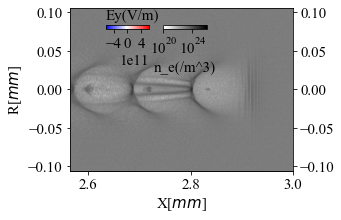

In [19]:
import matplotlib
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import MultipleLocator, FuncFormatter
from matplotlib import ticker, cm
from matplotlib.colors import LogNorm
####h


####
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
font = {'family' : 'Times New Roman',
        #'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 6
####
####
matplotlib.rc('font', **font)


fig,ax=plt.subplots(figsize=(4,3))
ax2=ax.twinx()
#ax3=ax.twinx()
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax2.spines['top'].set_visible(True)
#ax3.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax3.spines['right'].set_visible(False)

#ax3.spines['right'].set_position(('data',690))

####
plt.set_cmap(reg_cmap_transparent('bwr',create_alpha(lambda x:(1-abs(x/127.5-1)))))
cmap1 = plt.get_cmap()
plt.set_cmap(reg_cmap_transparent('binary',create_alpha(lambda x:(np.exp(x/(256))-1))))
cmap2 = plt.get_cmap()
name='${e_k}$  '
####

d_x=n*10e-15*3e8*1e3-636e-3
x=np.linspace(d_x,d_x+60*10.6*1e-3,1908)
r=np.linspace(-10*10.6*1e-3,10*10.6*1e-3,188)
X,R=np.meshgrid(x,r)

ZZ=ne.T
curve_cof= ax.pcolormesh(X,R,Ey.T,cmap=cm.bwr,shading='gouraud')
curve_temp= ax2.pcolormesh(X,R,ne.T,norm=LogNorm(vmin=ZZ.min()+0.01, vmax=ZZ.max()),cmap=cmap2,shading='gouraud')
curve_cof.set_clim((-Ey.max()*0.8,Ey.max()*0.8))

#curve_temp.set_clim((0,ne.max()*0.2))



position=fig.add_axes([0.25, 0.78, 0.15, 0.02])#位置[左,下,右,上]

cb=plt.colorbar(curve_cof,ticks=[-8e11,-4e11,0,4e11,8e11],cax=position,orientation='horizontal')#方向
#cb=plt.colorbar(curve_cof,ticks=[-8e11,-4e11,-2e11,0,2e11,4e11,8e11],cax=position,orientation='horizontal')#方向


#cb.set_label('Ey(V/m)',fontdict=font)
position2=fig.add_axes([0.45, 0.78, 0.15, 0.02])#位置[左,下,右,上]
cb2=plt.colorbar(curve_temp,cax=position2,orientation='horizontal')#方向


curve_temp.set_clim((1e20,1e26))

#cb2=plt.colorbar(curve_temp,cmap=plt.get_cmap('rainbow'),cax=position2,orientation='horizontal')#方向

#ticks=[0,1e24,2e24],

#curve_temp.set_clim((0,2e24))

cb2.set_label('n_e(/m^3)',fontdict=font)
cb.ax.set_title('Ey(V/m)',fontdict=font ,loc = 'left')

#cb2.ax.set_title('${n_e}$(/m^3)',fontdict=font,loc = 'left')

###
ax.set_xlabel('X'+ '[$mm$]',fontdict=font)
ax.set_ylabel('R'+ '[$mm$]',fontdict=font)


#####no ticks####
#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax2.set_yticklabels([])
##ax.set_xlabel("")
#ax.set_ylabel("")



######
#ax2.set_ylabel('Intensity'+'W/${m^2}$',fontdict=font)

ax.set_xlim((d_x+200e-3,d_x+636e-3))
####
plt.show()
fig.savefig('fig/'+str(n)+'_fig3a_new.png',dpi=400,bbox_inches = 'tight')

In [13]:
d_x=n*10e-15*3e8
d_x

0.009

In [160]:
ne.shape

(1000, 188)

In [161]:
X.shape

(188, 1000)

In [162]:
R.shape

(188, 1000)

In [194]:
curve_load.get_label()

AttributeError: 'list' object has no attribute 'get_label'

In [215]:
line2

In [216]:
line3